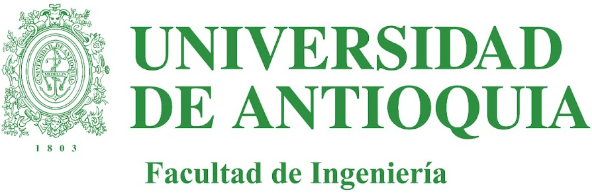

# **Modelos de Variable Latente para el Reconocimiento de Emociones**
## Docente: Hernán Felipe García Arias
## Por: David Alexander Sánchez, Juan Pablo Areiza
### Universidad de Antioquia, Medellín 2023

## Librerías

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.decomposition import PCA , KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

## PCA

Se realiza un código interactivo en la construcción del módulo de variable latenten utilizando PCA en el contexto del análisis multivariado de las señales fisiológicas. Para comparar el rendimiento de la calisficación, se plantea entrenar modelos lineales de clasificación, como Mínimos Cuadrados, Bayesiano y Regresión Logística, con el propósito de evaluar su rendimiento en el reconocimiento de los tipos de movimiento,  utilizando tanto los datos de entrenamiento y la matriz característica, como su proyección en el espacio latente. En este último, se varía el número de variables o componentes utilizados para describir el conjunto de datos original.


El código interactivo permite seleccionar el espacio de visualización de los datos (PCA o Entrada). También se dispone de una variable llamada "n_components" que permite variar la cantidad de componentes en el espacio latente, teniendo en cuenta como límite superior el número total de características extraídas (38).

In [7]:
df = pd.read_csv('features.csv', index_col=False)

# Características y las etiquetas emocionales
X = df.iloc[:, 2:]  # Ignorar la primera columna y las etiquetas
y = df['Emociones']

# Codificación de las etiquetas emocionales en números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Se normalizan las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

interactive(children=(Dropdown(description='PCA_flag', options=(True, False), value=True), IntSlider(value=19,…

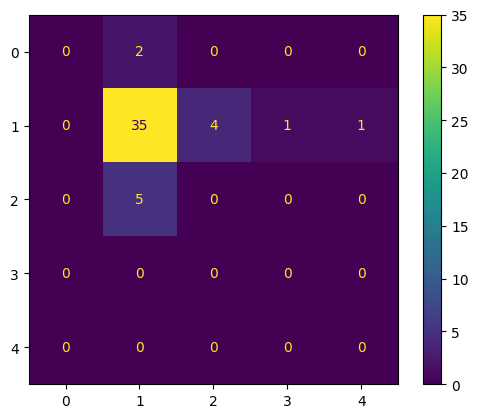

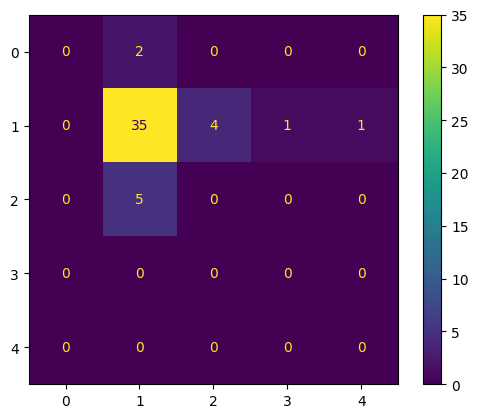

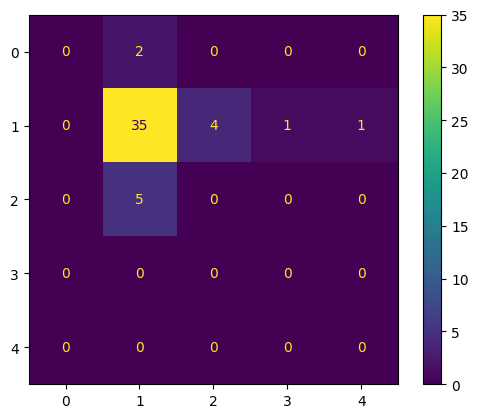

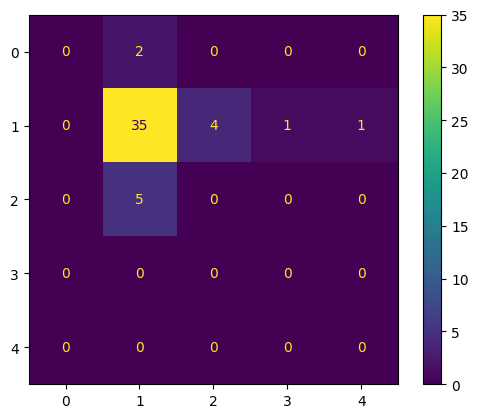

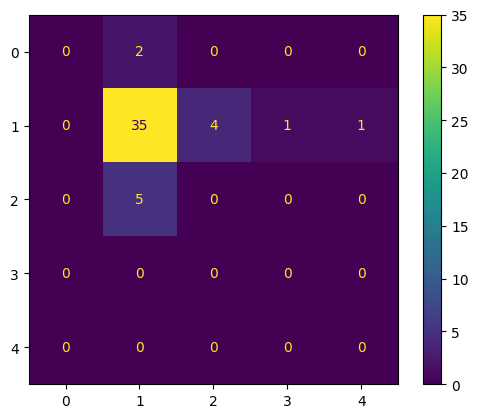

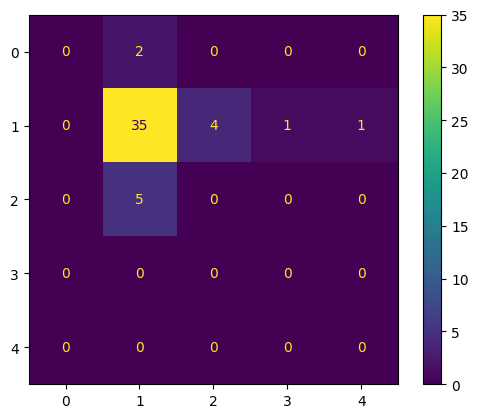

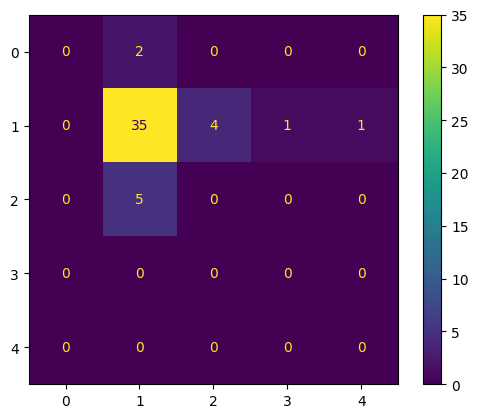

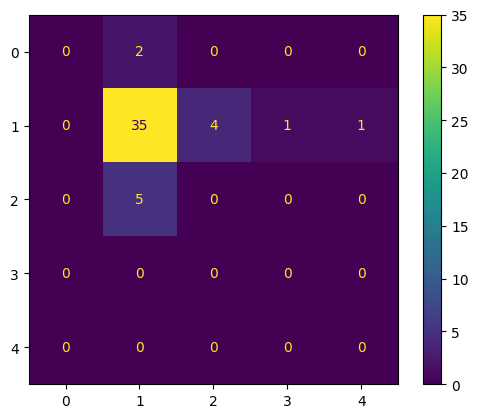

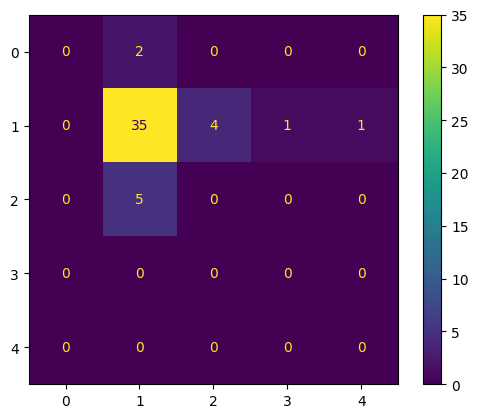

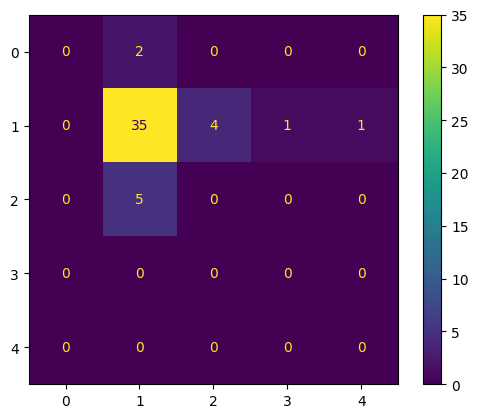

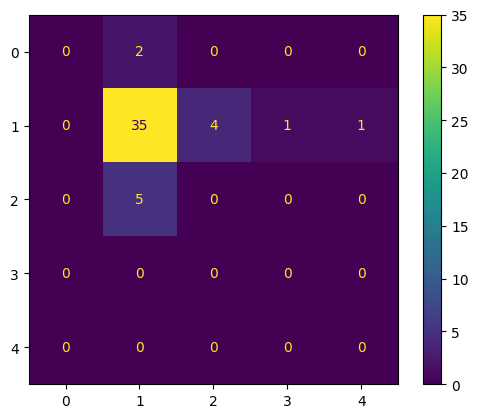

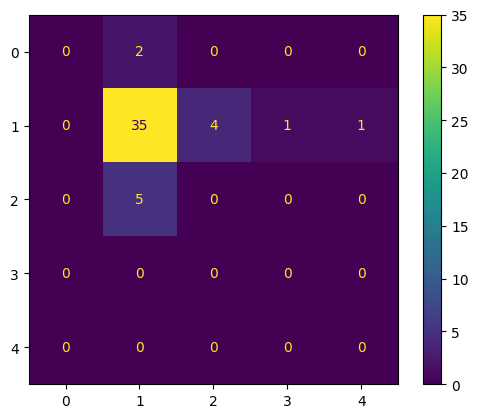

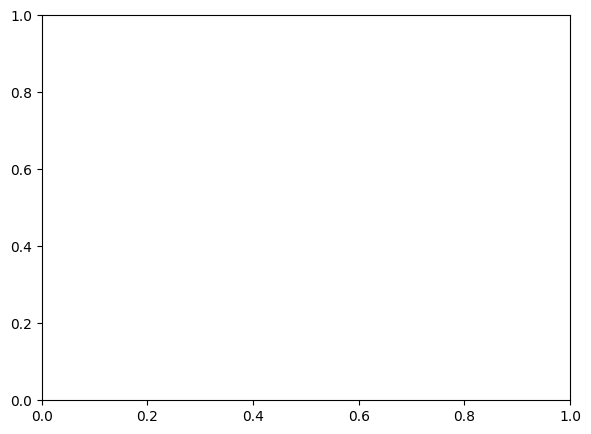

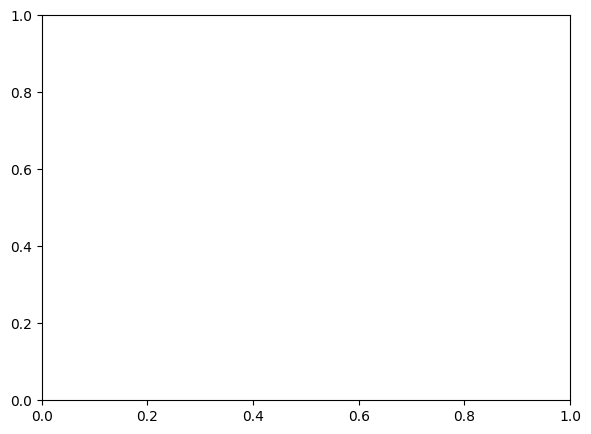

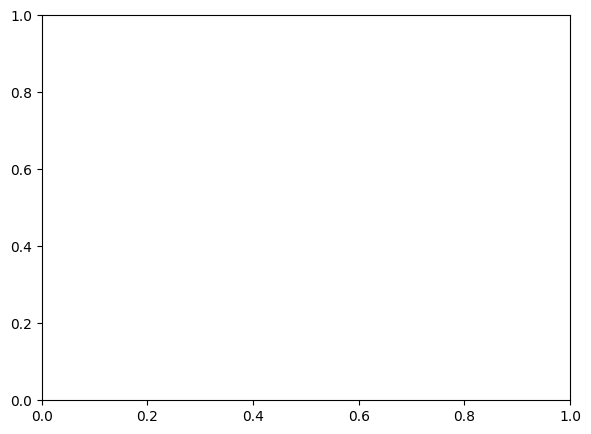

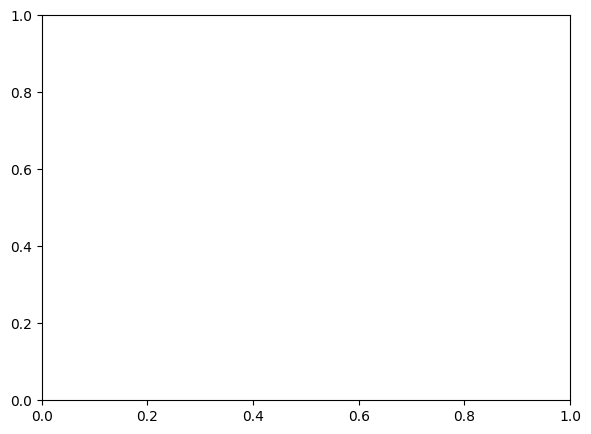

In [27]:
@interact(PCA_flag=[True,False],n_components=(1,38,1), model=["Mínimos_Cuadrados", "Bayesiano", "Regresion_Logstica"]) #Número de componentes máximo corresponde a la cantidad de características extraídas
def pca(PCA_flag, n_components, model):
  perc = (n_components/38) * 100
  print(f"Percent variables used: {np.round(perc,3)}%")

  # Análisis de Componentes Principales (PCA)
  pca = PCA(n_components=int(n_components))
  X_pca = pca.fit_transform(X_normalized) # Transformación de los datos al espacio latente
  df_pca = pd.DataFrame(data=X_pca)
  print("Original shape: ", X.shape)
  print("Transformed shape: ", X_pca.shape)


  if(PCA_flag==True):
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, random_state=0, test_size=0.3)
  else:
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, random_state=0, test_size=0.3)

  if(model=="Mínimos_Cuadrados"):
    # Modelo de Mínimos Cuadrados
    clasificadorMC = LinearRegression()
    clasificadorMC.fit(X_train, y_train)
    # Predicción (redondear a la clase más cercana)
    y_pred = np.round(clasificadorMC.predict(X_test)).astype(int)

  elif(model=="Bayesiano"):
    # Modelo Bayesiano
    clasificadorBayes = GaussianNB()
    clasificadorBayes.fit(X_train,y_train)
    # Predicción
    y_pred = clasificadorBayes.predict(X_test)

  else:
    # Modelo de Regresión Logística
    clasificadorRL = LogisticRegression()
    clasificadorRL.fit(X_train, y_train)
    # Predicción
    y_pred = clasificadorRL.predict(X_test)


  # Accuracy y matriz de confusión
  CMAT = confusion_matrix(y_test,y_pred)
  acc = accuracy_score(y_test, y_pred) * 100
  print()
  print(f'Accuracy: {acc}%')

  if(PCA_flag==True):
    # Espacio latente 2 componentes
    colors = ['r', 'c', 'g']  # Rojo para negativa, cian para neutra, verde para positiva

    plt.figure(figsize=(15, 5))

    # Subplot 1: Espacio latente 2 componentes
    plt.subplot(1, 2, 1)
    for i, emotion in enumerate(df['Emociones'].unique()):
        subset = df_pca[y_encoded == i]
        plt.scatter(subset[0], subset[1], label=emotion, color=colors[i]) #Se presenta la componente 1 y la 2

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.title(f'PCA con q={n_components} - Accuracy: {acc:.2f}')

    # Subplot 2: Matriz
    plt.subplot(1, 2, 2)
    plt.plot(np.cumsum(pca.explained_variance_) / np.sum(pca.explained_variance_))
    plt.title('Var explained normalized')
    plt.grid()

    plt.tight_layout()  # Ajusta automáticamente los subplots para evitar solapamientos
    plt.show()

  ax = ConfusionMatrixDisplay(confusion_matrix=CMAT, display_labels=np.unique(y_encoded))
  ax.plot()
  plt.show()

### Observaciones

## KPCA

In [32]:
@interact(PCA_flag=[True, False], KPCA_flag=[True, False], n_components=(1, 38, 1), k=['linear', 'poly', 'rbf', 'sigmoid', 'cosine'],gamma=[0.001, 0.01, 0.1, 1, 10, 100], degree=(1,10,1))
def pca_kpca(PCA_flag, KPCA_flag, n_components, k,gamma,degree):
    perc = (n_components / 38) * 100
    print(f"Percent variables used: {np.round(perc, 3)}%")

    # PCA
    if PCA_flag:
        pca = PCA(n_components=int(n_components))
        X_pca = pca.fit_transform(X_normalized)
        df_pca = pd.DataFrame(data=X_pca)
        print("PCA - Original shape: ", X_normalized.shape)
        print("PCA - Transformed shape: ", X_pca.shape)
    else:
        df_pca = df

    # KPCA
    if KPCA_flag:
        if k=='poly':
          kpca = KernelPCA(n_components=int(n_components), kernel=k, degree=degree)
        elif (k=='linear' or k=='cosine'):
          kpca = KernelPCA(n_components=int(n_components), kernel=k)
        else:
          kpca = KernelPCA(n_components=int(n_components), kernel=k,gamma=gamma)

        X_kpca = kpca.fit_transform(X_normalized)
        df_kpca = pd.DataFrame(data=X_kpca)
        print("KPCA - Original shape: ", X_normalized.shape)
        print("KPCA - Transformed shape: ", X_kpca.shape)
    else:
        df_kpca = df_pca  # Usa el DataFrame PCA si KPCA_flag es False

    colors = ['r', 'c', 'g']
    # Visualización de PCA y KPCA
    plt.figure(figsize=(15, 5))

    # Subplot 1: PCA
    plt.subplot(1, 2, 1)
    for i, emotion in enumerate(df['Emociones'].unique()):
        subset = df_pca[y_encoded == i]
        plt.scatter(subset[0], subset[1], label=emotion, color=colors[i])  # Se presenta la componente 1 y la 2

    plt.xlabel('PCA - Componente Principal 1')
    plt.ylabel('PCA - Componente Principal 2')
    plt.legend()
    plt.title(f'PCA with q={n_components}')

    # Subplot 2: KPCA
    plt.subplot(1, 2, 2)
    for i, emotion in enumerate(df['Emociones'].unique()):
        subset = df_kpca[y_encoded == i]
        plt.scatter(subset[0], subset[1], label=emotion, color=colors[i])  # Se presenta la componente 1 y la 2

    plt.xlabel('KPCA - Componente Principal 1')
    plt.ylabel('KPCA - Componente Principal 2')
    plt.legend()
    plt.title(f'KPCA with q={n_components}')

    plt.tight_layout()
    plt.show()

    # Subconjunto de datos transformados por KPCA
    X_train_kpca, X_test_kpca, y_train_kpca, y_test_kpca = train_test_split(df_kpca, y_encoded, random_state=0, test_size=0.3)

    # Clasificador basado en Regresión Logística con KPCA
    clasificadorRL_kpca = LogisticRegression()
    clasificadorRL_kpca.fit(X_train_kpca, y_train_kpca)
    y_pred_kpca = clasificadorRL_kpca.predict(X_test_kpca)

    # Evaluación del desempeño del clasificador con KPCA
    CMAT_kpca = confusion_matrix(y_test_kpca, y_pred_kpca)
    acc_kpca = accuracy_score(y_test_kpca, y_pred_kpca) * 100
    print()
    print(f'Regression Logstica con KPCA - Accuracy: {acc_kpca}%')

    # Matriz de Confusión con KPCA
    ax_kpca = ConfusionMatrixDisplay(confusion_matrix=CMAT_kpca, display_labels=np.unique(y_encoded))
    ax_kpca.plot()
    plt.show()

interactive(children=(Dropdown(description='PCA_flag', options=(True, False), value=True), Dropdown(descriptio…

Con KPCA, se observó una mayor separabilidad de los datos, a continuación, se presentan los pairplots de las componentes tanto para PCA como para KPCA utilizando regresión logística. Con PCA, se observó un mayor porcentaje de acierto con 4 componentes, KPCA Kernel rbf presenta igual accuracy, pero manteniendo mayor variabilidad de los datos al incluir más componentes y se observó mayor separabilidad de los datos